# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()


        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"] 
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto baquerizo moreno
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | savanna-la-mar
Processing Record 4 of Set 1 | tazacorte
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | ouellah
City not found. Skipping...
Processing Record 8 of Set 1 | yagry
City not found. Skipping...
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | ibiruba
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | mount isa
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | santana
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | polyarnyy
Processing Record 20 of Set 1 | petropavlovsk

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto baquerizo moreno,-0.9000,-89.6000,23.75,92,58,4.16,EC,1713783374
1,bredasdorp,-34.5322,20.0403,23.82,50,5,4.25,ZA,1713783484
2,savanna-la-mar,18.2190,-78.1332,24.97,87,3,1.73,JM,1713783487
3,tazacorte,28.6290,-17.9293,21.54,76,75,3.09,ES,1713783489
4,arraial do cabo,-22.9661,-42.0278,23.92,69,0,3.60,BR,1713783492


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,23.75,92,58,4.16,EC,1713783374
1,bredasdorp,-34.5322,20.0403,23.82,50,5,4.25,ZA,1713783484
2,savanna-la-mar,18.2190,-78.1332,24.97,87,3,1.73,JM,1713783487
3,tazacorte,28.6290,-17.9293,21.54,76,75,3.09,ES,1713783489
4,arraial do cabo,-22.9661,-42.0278,23.92,69,0,3.60,BR,1713783492


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

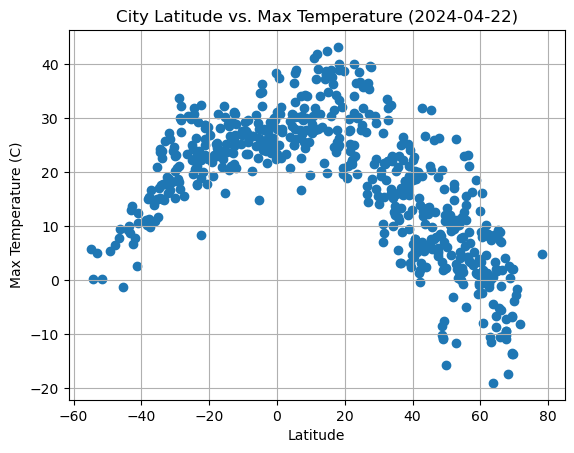

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-04-22)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

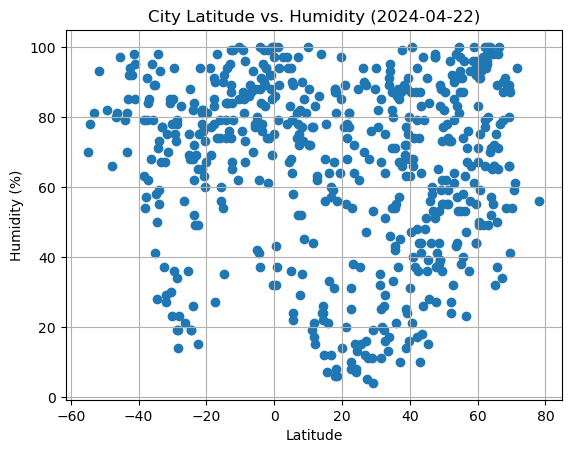

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-22)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

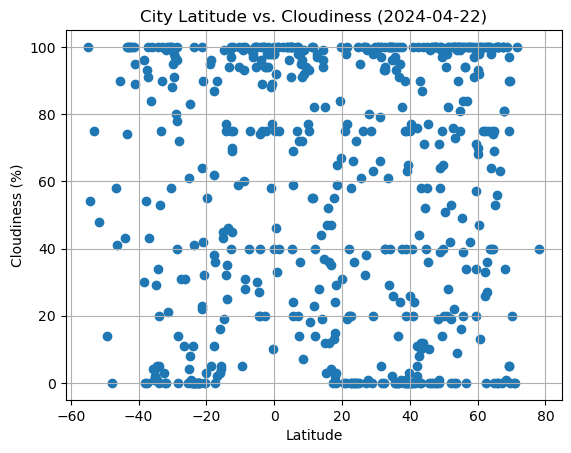

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-22)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

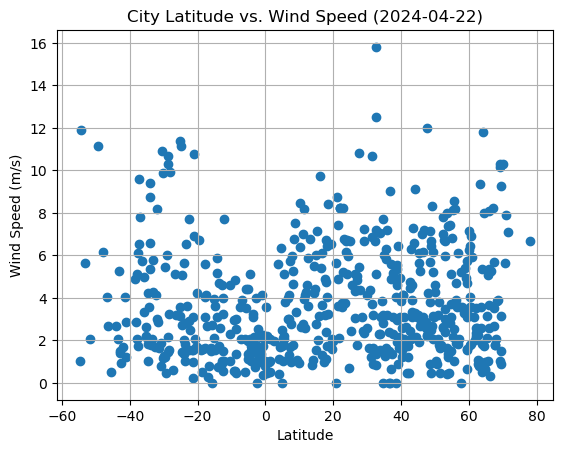

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-22)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots


In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,savanna-la-mar,18.2190,-78.1332,24.97,87,3,1.73,JM,1713783487
3,tazacorte,28.6290,-17.9293,21.54,76,75,3.09,ES,1713783489
5,hawaiian paradise park,19.5933,-154.9731,20.73,97,100,2.06,US,1713783502
8,udachny,66.4167,112.4000,1.92,100,100,0.31,RU,1713783508
9,yellowknife,62.4560,-114.3525,-0.71,94,0,2.57,CA,1713783509


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto baquerizo moreno,-0.9000,-89.6000,23.75,92,58,4.16,EC,1713783374
1,bredasdorp,-34.5322,20.0403,23.82,50,5,4.25,ZA,1713783484
4,arraial do cabo,-22.9661,-42.0278,23.92,69,0,3.60,BR,1713783492
6,ibiruba,-28.6275,-53.0897,16.84,79,100,2.14,BR,1713783504
7,grytviken,-54.2811,-36.5092,0.19,78,54,11.92,GS,1713783507


###  Temperature vs. Latitude Linear Regression Plot

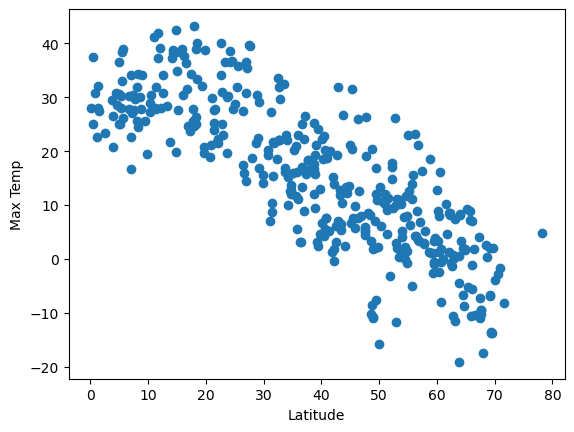

City_ID
2      26.815775
3      20.885080
5      26.032821
8      -0.643004
9       1.613452
         ...    
572     3.760068
574    24.275261
575    13.947248
576    23.405540
577    36.900977
Name: Lat, Length: 386, dtype: float64
y = -0.57x +37.2
The r-value is: 0.6684271614401931


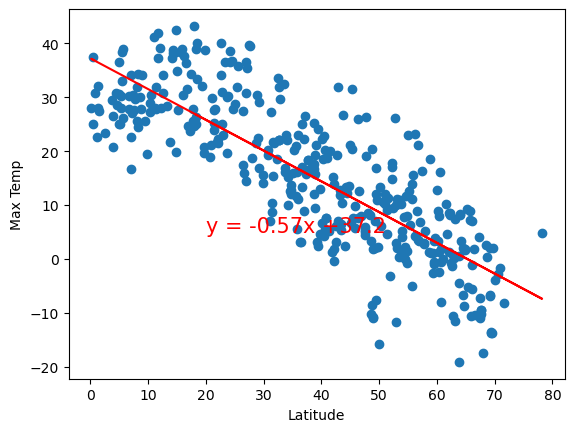

In [48]:
# Linear regression on Northern Hemisphere
# Create a Scatter Plot for temperature vs latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()



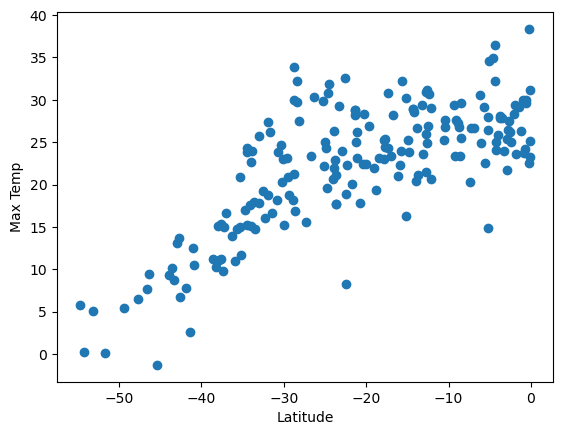

City_ID
0      30.350494
1      16.821328
4      21.474003
6      19.196601
7       8.876972
         ...    
567    29.898908
569    27.061428
571    16.968357
573    17.638817
578    19.268889
Name: Lat, Length: 193, dtype: float64
y = 0.4x +30.71
The r-value is: 0.548494960848018


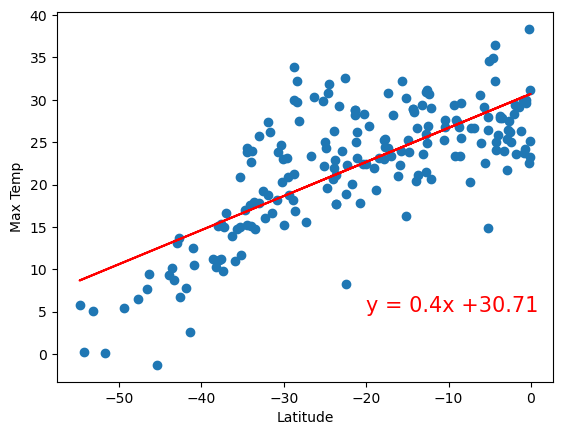

In [50]:
# Linear regression on Southern Hemisphere
# Create a Scatter Plot for temperature vs latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a negative regression in the Northern hemisphere which would be expected. As the latitude decreases you travel closer to the equator and the temperature would be expected to increase. There is a positive regression in the Southern hemisphere. As the latitude increases you travel closer to the equator and the temperature would be expected to rise.

### Humidity vs. Latitude Linear Regression Plot

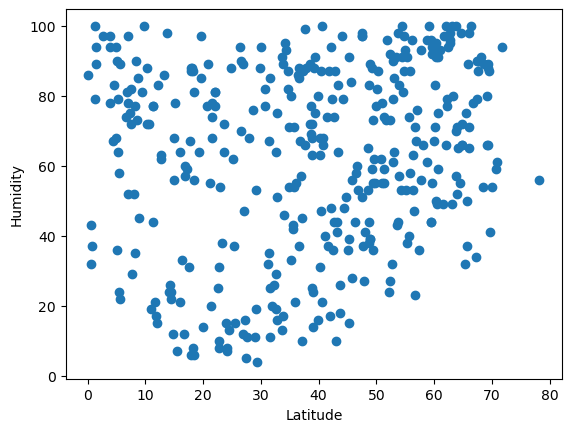

City_ID
2      57.445918
3      59.873901
5      57.766453
8      68.687338
9      67.763562
         ...    
572    66.884753
574    58.485985
575    62.714197
576    58.842043
577    53.317111
Name: Lat, Length: 386, dtype: float64
y = 0.23x +53.2
The r-value is: 0.029828534496905996


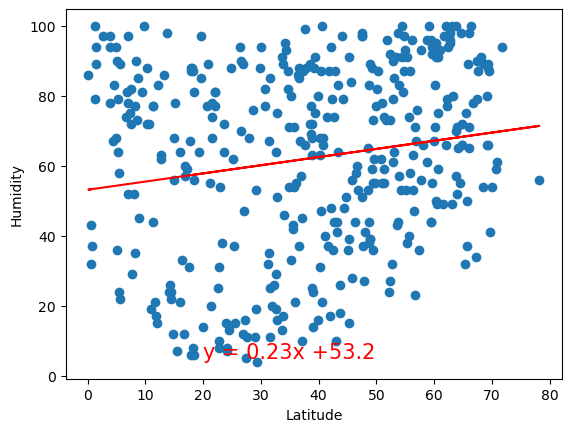

In [42]:
# Northern Hemisphere
# Create a Scatter Plot for humidity vs latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

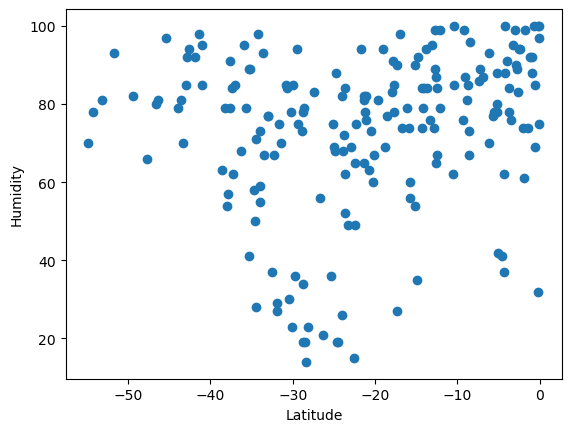

City_ID
0      78.412934
1      69.546631
4      72.595749
6      71.103260
7      64.340318
         ...    
567    78.116988
569    76.257454
571    69.642986
573    70.082370
578    71.150633
Name: Lat, Length: 193, dtype: float64
y = 0.26x +78.65
The r-value is: 0.02998646095076665


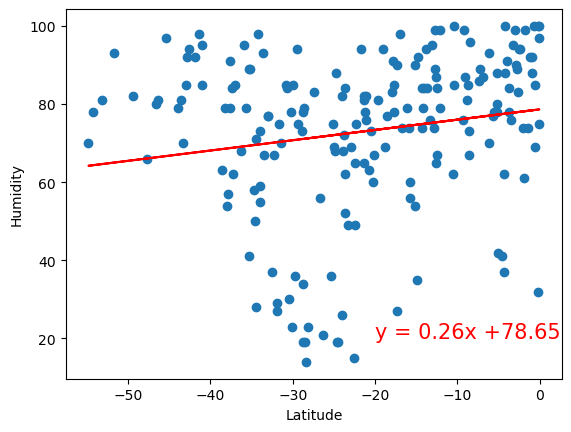

In [52]:
# Southern Hemisphere
# Create a Scatter Plot for humidity vs latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is no significant difference in humidity levels based on a cities latitude.

### Cloudiness vs. Latitude Linear Regression Plot

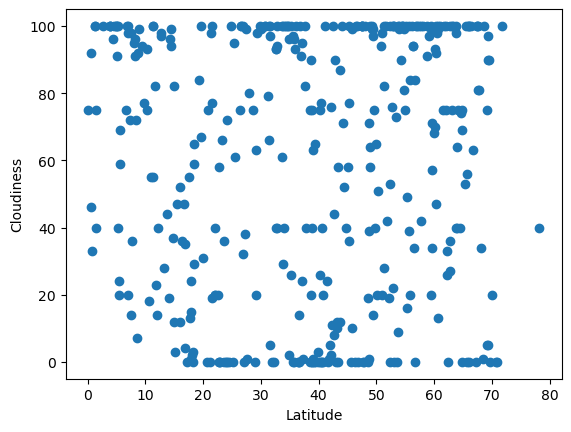

City_ID
2      56.781972
3      57.446350
5      56.869681
8      59.858006
9      59.605229
         ...    
572    59.364758
574    57.066570
575    58.223552
576    57.163999
577    55.652190
Name: Lat, Length: 386, dtype: float64
y = 0.06x +55.62
The r-value is: 0.0010458556800986077


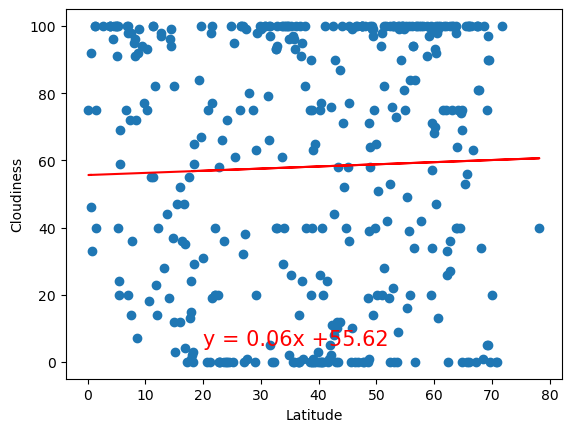

In [44]:
# Northern Hemisphere
# Create a Scatter Plot for cloudiness vs latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

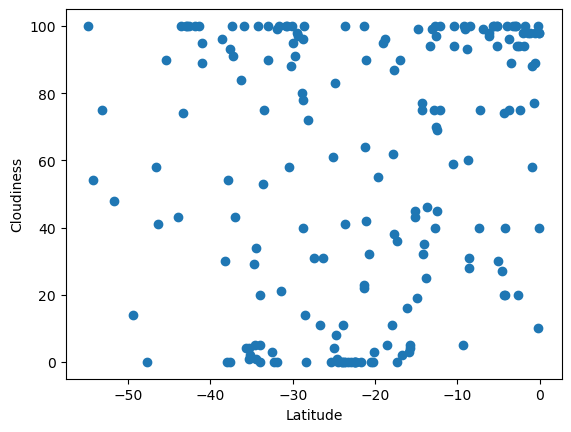

City_ID
0      66.048825
1      50.432883
4      55.803199
6      53.174525
7      41.263169
         ...    
567    65.527584
569    62.252444
571    50.602591
573    51.376465
578    53.257963
Name: Lat, Length: 193, dtype: float64
y = 0.46x +66.47
The r-value is: 0.02700224632573329


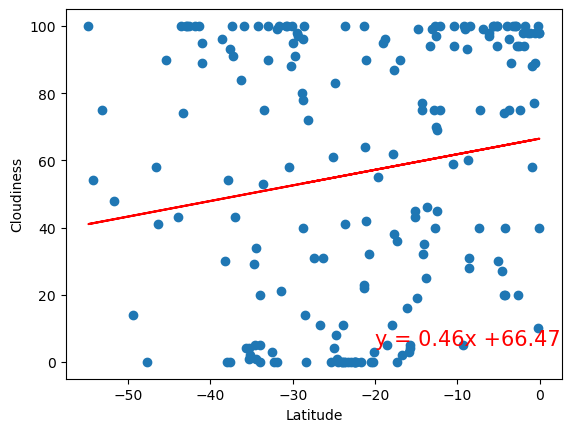

In [53]:
# Southern Hemisphere
# Create a Scatter Plot for cloudiness vs latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There was no significant results in the northern Hemisphere that would suggest a link between latitude and cloudiness, however in the Southern hemisphere there is positive linear regression that shows cloudiness reduces with a decrease in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

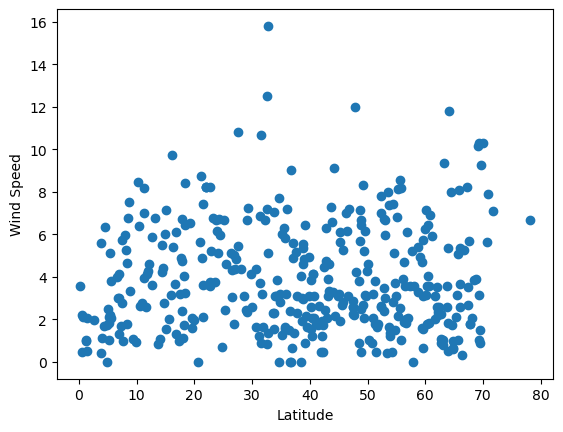

City_ID
2      3.817190
3      3.862285
5      3.823144
8      4.025975
9      4.008818
         ...   
572    3.992496
574    3.836507
575    3.915037
576    3.843120
577    3.740507
Name: Lat, Length: 386, dtype: float64
y = 0.0x +3.74
The r-value is: 0.0011014921148419148


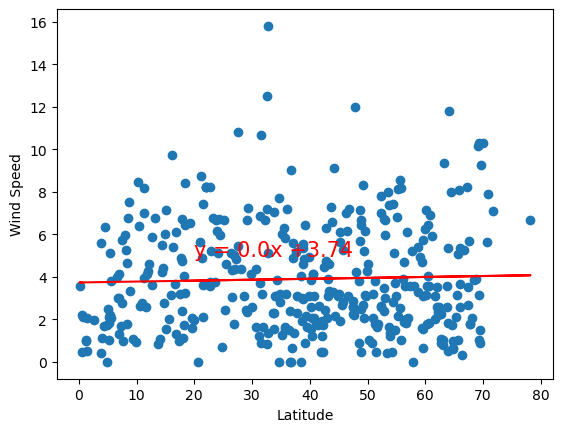

In [46]:
# Northern Hemisphere
# Create a Scatter Plot for Wind Speed vs latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

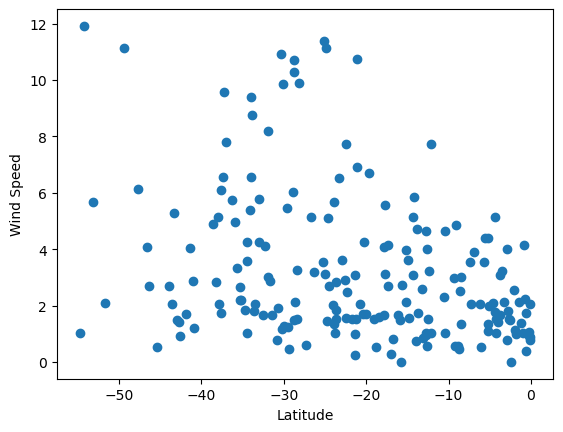

City_ID
0      1.950490
1      4.055427
4      3.331540
6      3.685869
7      5.291450
         ...   
567    2.020750
569    2.462220
571    4.032551
573    3.928237
578    3.674623
Name: Lat, Length: 193, dtype: float64
y = -0.06x +1.89
The r-value is: 0.10766564515886237


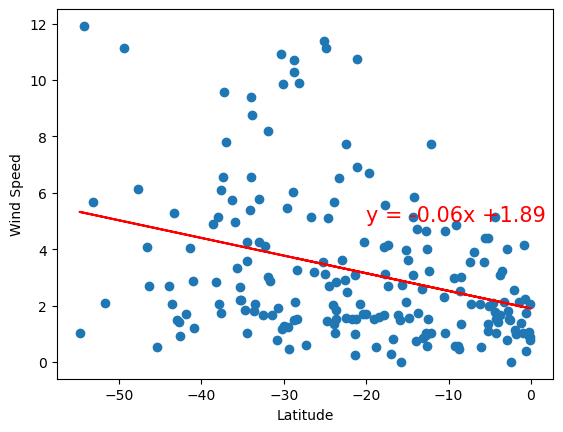

In [54]:
# Southern Hemisphere
# Create a Scatter Plot for wind speed vs latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern hemisphere there is no significant effect of latitude on wind speed for a city. In the Southern hemisphere, there is a negative linear regression suggesting that the overall wind speed for a city decreases as you travel closer to the equator.